In [2]:
import numpy

numpy.__version__

'1.26.4'

In [3]:
import inference

Matplotlib is building the font cache; this may take a moment.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


In [7]:
!export ROBOFLOW_API_KEY="WNJX84xQlZsMICKGFtRR"


In [8]:
!echo $ROBOFLOW_API_KEY

In [10]:
model = inference.get_model("robot-detection-xru6m/4", api_key="WNJX84xQlZsMICKGFtRR")

In [15]:
from PIL import Image, ImageDraw


In [17]:
results = model.infer(image="/Users/shravanprasanth/Documents/AIScouter/src/main/test.png", confidence=0.5).json()

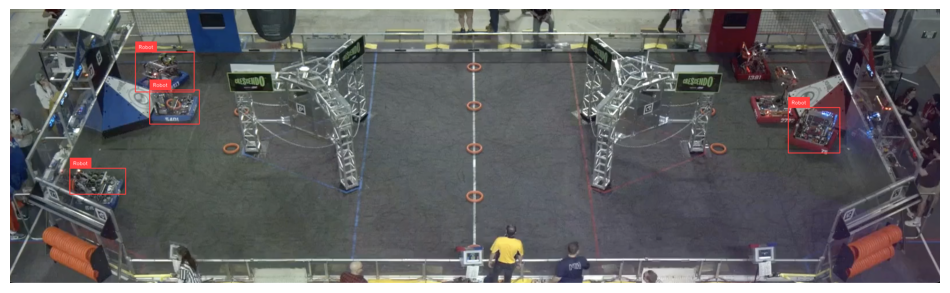

In [28]:
from io import BytesIO
import cv2
import requests
import supervision as sv
from inference import get_model
from PIL import Image
from PIL.ImageFile import ImageFile



# load the image from an url
image = Image.open("/Users/shravanprasanth/Documents/AIScouter/src/main/test.png")

# load a pre-trained yolov8n model
model = get_model("robot-detection-xru6m/4", api_key="WNJX84xQlZsMICKGFtRR")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)

In [39]:
results = model.infer(image, confidence=0.35)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

image_cv2 = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)

# Create Supervision annotators
bounding_box_annotator = sv.BoxAnnotator()

# Annotate the image with bounding boxes
annotated_image = bounding_box_annotator.annotate(scene=image_cv2, detections=detections)

# Extract the data from detections
bboxes = detections.xyxy
confidences = detections.confidence
class_names = detections.data['class_name']

# Draw labels manually using OpenCV
for bbox, confidence, class_name in zip(bboxes, confidences, class_names):
    bbox = bbox.astype(int)  # Convert to integer coordinates
    x0, y0, x1, y1 = bbox
    label = f"{class_name} ({confidence:.2f})"
    
    # Draw the bounding box
    cv2.rectangle(annotated_image, (x0, y0), (x1, y1), color=(0, 255, 0), thickness=2)
    
    # Draw the label
    cv2.putText(annotated_image, label, (x0, y0 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert back to PIL for saving
annotated_image_pil = Image.fromarray(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))

# Display the annotated image
annotated_image_pil

TypeError: from_inference() got an unexpected keyword argument 'confidence'